![zadanie](tasks/2.png)

In [1]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

N = 88
A = 2
SHIFTS = np.arange(4) * N // 4
A_THRESHOLD = 1e-6


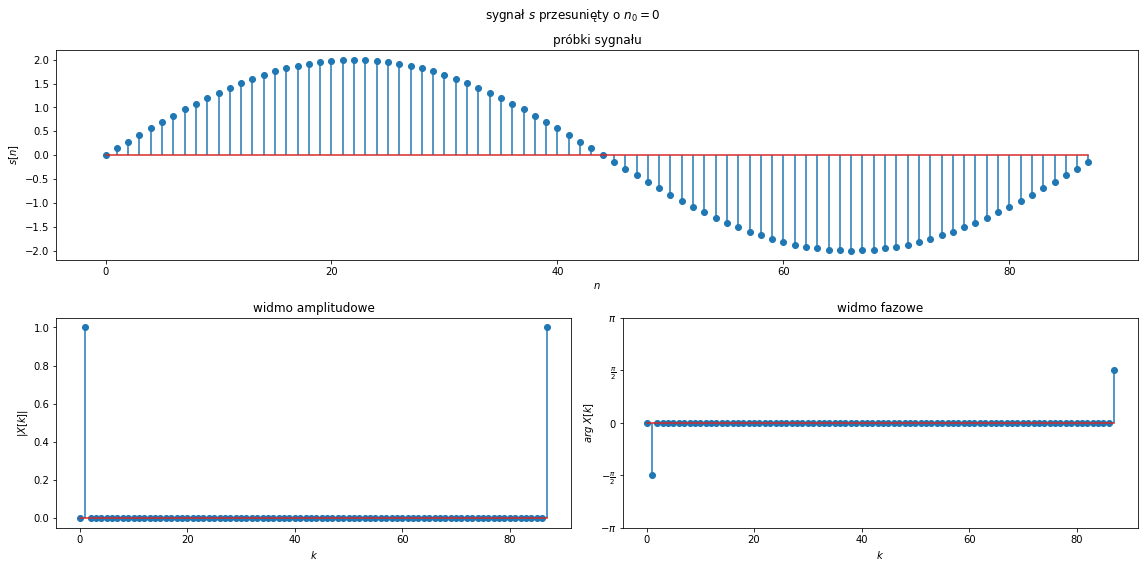

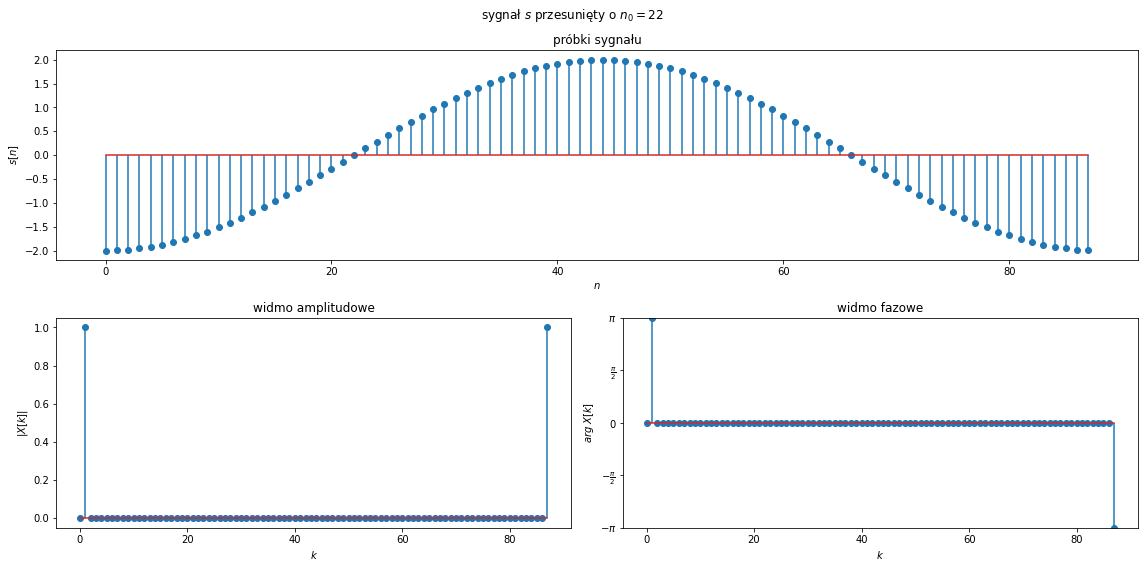

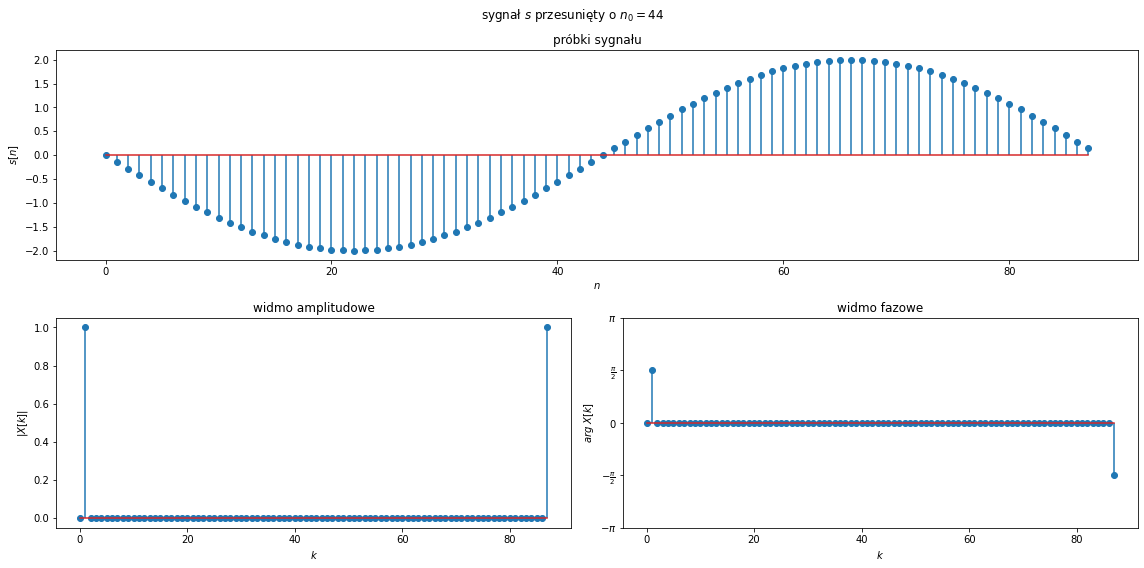

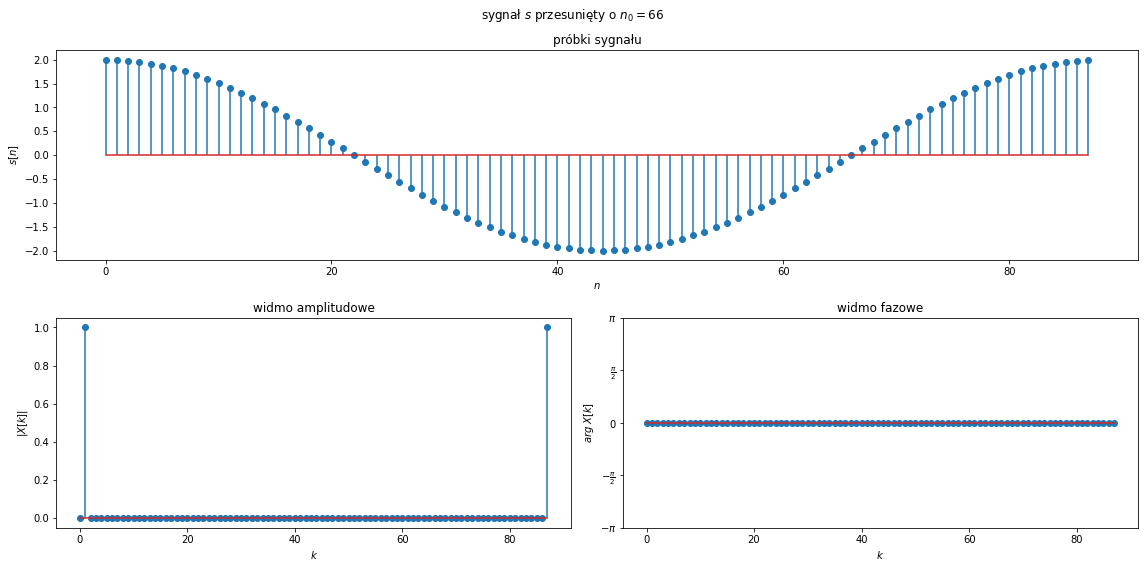

In [3]:
for shift in SHIFTS:
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(f"sygnał $s$ przesunięty o $n_0={shift}$")
    gs = GridSpec(ncols=2, nrows=2, figure=fig)

    ax_s = fig.add_subplot(gs[0, :])
    ax_ampl = fig.add_subplot(gs[1, 0])
    ax_phase = fig.add_subplot(gs[1, 1])

    s = A * np.sin(2 * np.pi * (np.arange(N) - shift) / N)
    ax_s.stem(s)
    ax_s.set_title("próbki sygnału")
    ax_s.set_xlabel("$n$")
    ax_s.set_ylabel("$s[n]$")

    s_fft = np.fft.fft(s) / N
    s_amplitude_spc = np.abs(s_fft)

    # filter insignificant frequencies for clearer plots
    significance_mask = s_amplitude_spc <= A_THRESHOLD
    s_amplitude_spc[significance_mask] = 0
    s_fft[significance_mask] = 0

    s_phase_spc = np.angle(s_fft)

    ax_ampl.stem(s_amplitude_spc)
    ax_ampl.set_title("widmo amplitudowe")
    ax_phase.stem(s_phase_spc)
    ax_ampl.set_xlabel("$k$")
    ax_ampl.set_ylabel("$|X[k]|$")

    ax_phase.set_title("widmo fazowe")
    ax_phase.set_ylim((-np.pi, np.pi))
    ax_phase.set_xlabel("$k$")
    ax_phase.set_ylabel("$arg \\; X[k]$")
    yticks = [
        (-np.pi, '$-\\pi$'),
        (-np.pi / 2, '$-\\frac{\\pi}{2}$'),
        (0, '$0$'),
        (np.pi / 2, '$\\frac{\\pi}{2}$'),
        (np.pi, '$\\pi$')
    ]
    ax_phase.set_yticks([t for t, _ in yticks])
    ax_phase.set_yticklabels([l for _, l in yticks])

    fig.tight_layout()
    plt.show()
    plt.close()


Obserwacje:
* dla każdego przesunięcia widmo amplitudowe jest takie samo
* dla każdego kolejnego przesunięcia sygnału o $\frac{N}{4}$ zmienia się widmo fazowe:
  * $X[1]$ zmniejszane jest o $-\frac{\pi}{2}$
  * $X[N-1]$ zwiększane jest o $+\frac{\pi}{2}$

Wynika to właściwości przesunięcia w dzedzinie czasu DFT
$$ x[n-n_0] \leftrightarrow X[k] e^{-j\frac{2\pi}{N}kn_0} $$

W naszym przypadku:
$$ x[n-22] \leftrightarrow X[k] e^{-j\frac{\pi}{2}k} $$
$$ x[n-44] \leftrightarrow X[k] e^{-j \pi k} $$
$$ x[n-66] \leftrightarrow X[k] e^{-j\frac{3\pi}{2}k} $$

Po podstawieniu $k=1$ lub $k=-1$ wyjdą zaobserwowane zmiany w widmie.